Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2024./2025.  
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Prva laboratorijska vježba: Linearna regresija

*Verzija: 1.0
Zadnji put ažurirano: 1. 10. 2021.*

(c) 2015-2025 Jan Šnajder, Domagoj Alagić 

Rok za predaju: **20. listopada 2024. u 23:59h**

------------------------------

### Pravila predaje
Predajom vježbe potvrđujete sljedeće točke:
1. Niste od drugoga primili pomoć pri rješavanju vježbe;
2. Atribuirali ste dijelove koda koji su preuzeti s interneta referencirajući ih u komentarima;
3. Niste koristili dijelove koda s interneta koji su specifični za laboratorijsku vježbu;
4. Niste koristili UI-asistente za kodiranje kao npr. GitHub Copilot (uključivo alate generativne UI, kao što je ChatGPT).

**Povreda bilo kojeg od gornjih pravila smatra se prekršajem te povlači akademske sankcije.**

### Upute

Prva laboratorijska vježba sastoji se od sedam zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [2]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [3]:
from sklearn.preprocessing import PolynomialFeatures
# Vaš kôd ovdje

fi = PolynomialFeatures(1)
fiMtrx = fi.fit_transform(X)
fiMtrx

array([[1., 0.],
       [1., 1.],
       [1., 2.],
       [1., 4.]])

### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [4]:
from numpy import linalg
# Vaš kôd ovdje

w = linalg.inv(fiMtrx.T @ fiMtrx) @ fiMtrx.T @ y
w2 = linalg.pinv(fiMtrx) @ y

print(w)
print(w2)
print(w-w2)
# Iste su ali ima mala razlika na 16. decimali

[2.2        0.45714286]
[2.2        0.45714286]
[ 8.88178420e-16 -2.22044605e-16]


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}^{(i)}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

In [5]:
from sklearn.metrics import mean_squared_error
# Vaš kôd ovdje
# fiMtrx je 4x2 a w je 2x1 -> 4x1 vektor
h = fiMtrx @ w

mse = mean_squared_error(y, h)
errFunc = sum((y-h)**2)*0.5

print(f"MSE:\t{mse}\nError:\t{errFunc}")


MSE:	2.042857142857143
Error:	4.085714285714286


### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [6]:
# Vaš kôd ovdje
# w = linalg.inv(fiMtrx) @ y
# LinAlgError: Last 2 dimensions of the array must be square

fiMtrx = PolynomialFeatures(3).fit_transform(X)
print(fiMtrx)
w = linalg.inv(fiMtrx) @ y
w
# funkcionira i možemo to raditi no to nam zakomplicirava situaciju te model postaje overfittan

[[ 1.  0.  0.  0.]
 [ 1.  1.  1.  1.]
 [ 1.  2.  4.  8.]
 [ 1.  4. 16. 64.]]


array([ 4.        , -5.91666667,  3.375     , -0.45833333])

### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Provjerite jesu li težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Ako nisu, prilagodite kôd tako da jest.

**NB:** Obratite pozornost na to kako klase [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) i [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) koriste pomak i osigurajte da ga ne dodajete više puta.

Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [7]:
from sklearn.linear_model import LinearRegression
# Vaš kôd ovdje
reg = LinearRegression().fit(X, y)

print(f"w0:\t{reg.intercept_}")
print(f"w1.:\t{reg.coef_}")
# rješenje je isto kao i gore!
print(f"Org. w:\t{w2}")

pred = reg.predict(X)
errF = sum((pred-y)**2)*0.5

print(f"New err:\t{errF}")
print(f"Old err:\t{errFunc}")

w0:	2.2
w1.:	[0.45714286]
Org. w:	[2.2        0.45714286]
New err:	4.085714285714286
Old err:	4.085714285714286


### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [8]:
from numpy.random import normal
def make_labels(X, f, noise=0):
    # Vaš kôd ovdje
    # f ćemo definirati kao vektor Nx1 tako da možemo raditi matrični izračun
    # pretpostaviti ćemo da su nam sve funkcije iste i da je X uvijek Nx1
    """ labels = []
    for x in X:
        label = 0
        for i in range(len(f)):
            label += f[i]*x**i + normal(0,noise)
        labels.append(label) """
    labels = np.polyval(f[::-1], X) + normal(0, noise, size=X.shape)
    return labels

In [9]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

In [10]:
# Vaš kôd ovdje
X = make_instances(-5, 5, 50)
y = make_labels(X,[5,1,-2, -5], 200)

Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

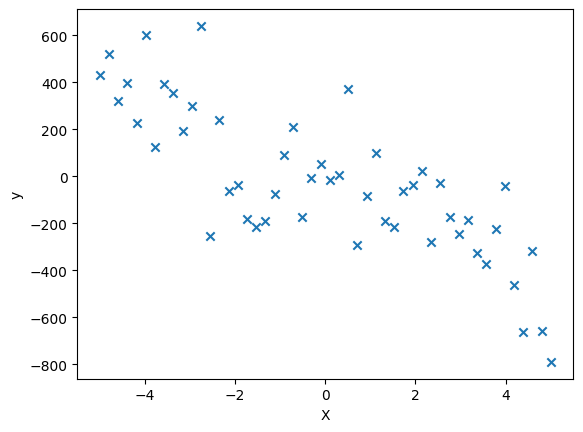

In [11]:
# Vaš kôd ovdje
plt.scatter(X,y, marker="x")
plt.ylabel("y")
plt.xlabel("X")
plt.show()

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

w0, w1, w2, w3 = [[-16.92863534 -21.86882278  -1.00688403  -3.98761162]]
MSE=	30253.452728676504
EmpErr=	756336.3182169126


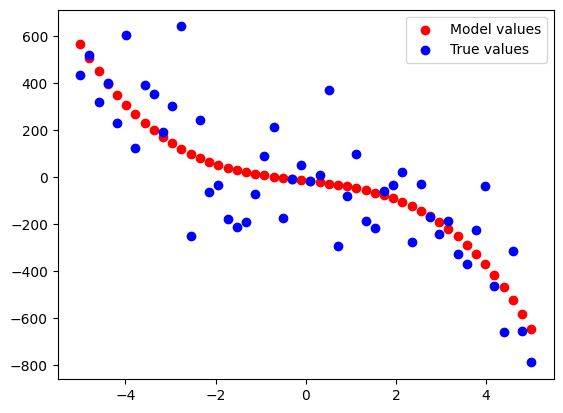

In [12]:
# Vaš kôd ovdje
xReg = PolynomialFeatures(3).fit_transform(X)
model = LinearRegression(fit_intercept=False).fit(xReg, y)
# bez fit_intercpeta nam se na nulto mjesto u coef_ smjesti 0 što ne želimo
print(f"w0, w1, w2, w3 = {model.coef_}")

pred = model.predict(xReg)
#print(pred)

mse = mean_squared_error(y, pred) 
errF = 0.5*sum((y-pred)**2)
print(f"MSE=\t{mse}")
print(f"EmpErr=\t{errF}")

# za ubuduće jer mi se ne piše stalno isti izraz
def empErr(y, h) -> float:
    return 0.5*sum((y-h)**2)
    
plt.scatter(X, pred, color="red", label="Model values")
plt.scatter(X, y, color="blue", label="True values")
plt.legend()
plt.show()

### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

H1
MSE h:	36689.32915605506
EmpErr:	917233.2289013765

H2
MSE h:	30253.452728676504
EmpErr:	756336.3182169126

H3
MSE h:	28673.499553393285
EmpErr:	716837.4888348321

H4
MSE h:	24926.175383754668
EmpErr:	623154.3845938666

H5
MSE h:	21102.941151913452
EmpErr:	527573.5287978363



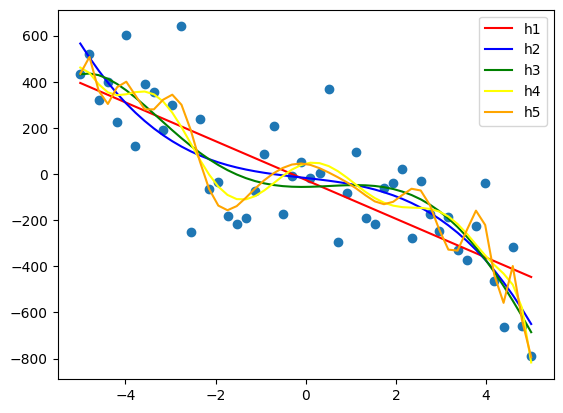

In [13]:
# Vaš kôd ovdje
fi1 = PolynomialFeatures(1, include_bias=True).fit_transform(X)
fi2 = PolynomialFeatures(3, include_bias=True).fit_transform(X)
fi3 = PolynomialFeatures(5, include_bias=True).fit_transform(X)
fi4 = PolynomialFeatures(10, include_bias=True).fit_transform(X)
fi5 = PolynomialFeatures(20, include_bias=True).fit_transform(X)
#print(f"h1Coef: {h1.coef_}\nh2Coef: {h2.coef_}\nh3Coef: {h3.coef_}\nh1Coef: {h4.coef_}\nh1Coef: {h4.coef_}\nh5Coef: {h5.coef_}\n")
colors = ["red", "blue", "green", "yellow", "orange"]
Fid = [fi1, fi2, fi3, fi4, fi5]

i = 1
for fi in Fid:
    model = LinearRegression(fit_intercept=False).fit(fi, y)
    h = model.predict(fi)
    print(f"H{i}\nMSE h:\t{mean_squared_error(y, h)}\nEmpErr:\t{empErr(y, h)}\n")
    plt.plot(X, h, color=colors[i-1], label=f"h{i}")
    i+=1
plt.scatter(X, y)
plt.legend()
plt.show()

### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih dvadeset modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

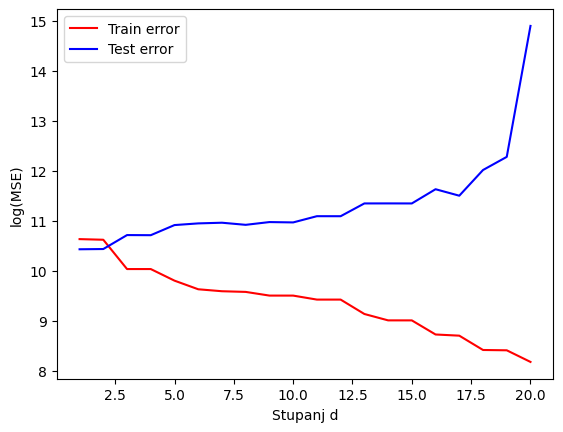

In [14]:
from sklearn.model_selection import train_test_split
# Vaš kôd ovdje
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

trainErr = []
testErr = []

for d in range(1, 21):
    formator = PolynomialFeatures(d, include_bias=True)
    fi_train = formator.fit_transform(X_train)
    fi_test = formator.fit_transform(X_test)
    
    model = LinearRegression(fit_intercept=False)
    model.fit(fi_train, y_train)
    
    h_train = model.predict(fi_train)
    h_test = model.predict(fi_test)
    
    trainErr.append(mean_squared_error(y_train, h_train))
    testErr.append(mean_squared_error(y_test, h_test))

plt.plot([x for x in range(1,21)], log(trainErr), color="red", label="Train error")
plt.plot([x for x in range(1,21)], log(testErr), color="blue", label="Test error")
plt.xlabel("Stupanj d")
plt.ylabel("log(MSE)")
plt.legend()
plt.show()
    

### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

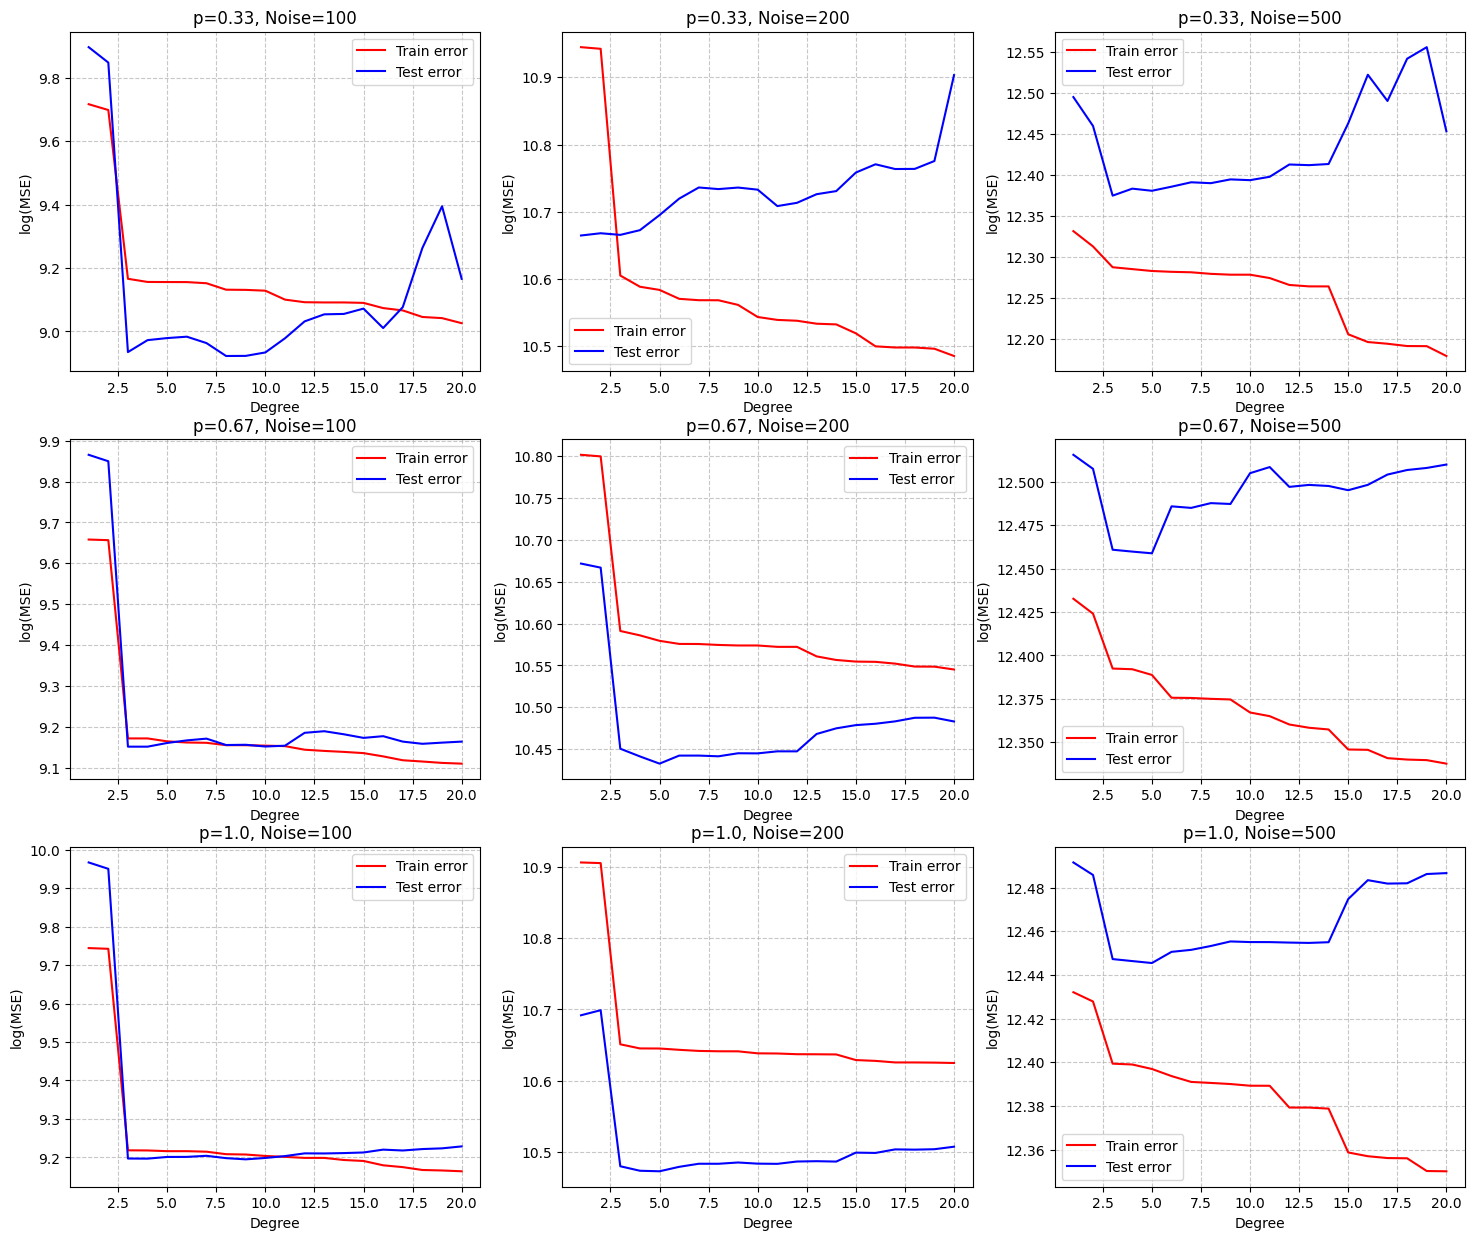

In [15]:
# Vaš kôd ovdje
import random
X = make_instances(-5, 5, 1000)
X_train, X_test = train_test_split(X, train_size=0.5)

noises = [100, 200, 500]

y_train, y_test = [], []


for n in noises:
    y_train.append(make_labels(X_train,[5,1,-2,-5], n))
    y_test.append(make_labels(X_test, [5,1,-2,-5], n))

plt.figure(figsize=(18, 15))

index = 1

for i in range(1,4):
    randIndexTrain = random.sample(range(0, len(X_train)), round(len(X_train)*(i/3)))
    randIndexTest = random.sample(range(0, len(X_test)), round(len(X_test)*(i/3)))
    X_train_part = X_train[randIndexTrain]
    X_test_part = X_test[randIndexTest]
    
    for j in range(len(noises)):
        y_train_part = [y_train[j][ind] for ind in randIndexTrain]
        y_test_part = [y_test[j][ind] for ind in randIndexTest]
        
        errTrain = []
        errTest = []
        
        for deg in range(1,21):
            formator = PolynomialFeatures(deg, include_bias=True)
            fi_train = formator.fit_transform(X_train_part)
            fi_test = formator.fit_transform(X_test_part)
            
            model = LinearRegression(fit_intercept=False)
            model.fit(fi_train, y_train_part)
            
            h_train = model.predict(fi_train)
            h_test = model.predict(fi_test)
            
            errTrain.append(mean_squared_error(y_train_part, h_train))
            errTest.append(mean_squared_error(y_test_part, h_test))
        
        # kod modidficiran sa https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
        ax = plt.subplot(3,3,index)
        ax.set_title(f"p={round(i/3,2)}, Noise={noises[j]}")
        ax.plot([x for x in range(1,21)], np.log(errTrain), color="red", label="Train error")
        ax.plot([x for x in range(1,21)], np.log(errTest), color="blue", label="Test error")
        ax.legend(loc="best")
        ax.set_xlabel("Degree")
        ax.set_ylabel("log(MSE)")
        ax.tick_params(axis='both', which='major')
        ax.grid(True, linestyle='--', alpha=0.7)
        index += 1
            
plt.show()




***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [16]:
# Vaš kôd ovdje
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])
learn_fact = [0, 1, 10]

fi = PolynomialFeatures(3, include_bias=True).fit_transform(X)
#print(fi, fi.shape)

weights = []
I = np.identity(fi.shape[0])
I[0][0] = 0
#print(10*I)

for factor in learn_fact:
    w = linalg.inv(fi.T @ fi + factor * I) @ fi.T @ y
    print(f"Learning factor:\t{factor}\nweights:\n{w}\n---------------------------------------------------\n")

Learning factor:	0
weights:
[ 4.         -5.91666667  3.375      -0.45833333]
---------------------------------------------------

Learning factor:	1
weights:
[ 3.05696145 -0.69079365 -0.2831746   0.1445805 ]
---------------------------------------------------

Learning factor:	10
weights:
[ 2.49444184 -0.15897295 -0.13423067  0.0815601 ]
---------------------------------------------------



### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`). Ponovno, pripazite na pomak.

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [17]:
from sklearn.linear_model import Ridge
# Vaš kôd ovdje
for factor in learn_fact:
    # fit_intercept kontrolira ako će nam se bias prikazati kroz intercept_ ili kroz coef_
    model = Ridge(factor, fit_intercept=True).fit(fi, y)
    print(f"Learning factor:\t{factor}\nweights:\n{model.intercept_}\n{model.coef_}\n---------------------------------------------------\n")
    #model = Ridge(factor, fit_intercept=False).fit(fi, y)
    #print(f"Learning factor:\t{factor}\nweights:\n{model.coef_}\n---------------------------------------------------\n")
    


Learning factor:	0
weights:
4.0000000000000355
[ 0.         -5.91666667  3.375      -0.45833333]
---------------------------------------------------

Learning factor:	1
weights:
3.0569614512471652
[ 0.         -0.69079365 -0.2831746   0.1445805 ]
---------------------------------------------------

Learning factor:	10
weights:
2.4944418431229725
[ 0.         -0.15897295 -0.13423067  0.0815601 ]
---------------------------------------------------



### (c)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

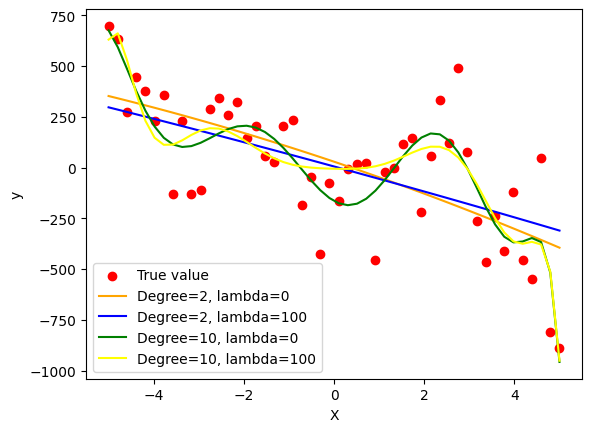

In [18]:
# Vaš kôd ovdje
X = make_instances(-5, 5, 50)
y = make_labels(X,[5,1,-2,-5], 200)

learn_fact = [0, 100]
degrees = [2, 10]
fi_2 = PolynomialFeatures(2, include_bias=True).fit_transform(X)
fi_10 = PolynomialFeatures(10, include_bias=True).fit_transform(X)

fi = [fi_2, fi_10]

# H_d_f gdje je d degree a f stupanj učenja
H_2_0=Ridge(0, fit_intercept=False).fit(fi_2,y)
H_2_100=Ridge(100, fit_intercept=False).fit(fi_2,y)
H_10_0=Ridge(0, fit_intercept=False).fit(fi_10,y)
H_10_100=Ridge(100, fit_intercept=False).fit(fi_10,y)

H = [H_2_0, H_2_100, H_10_0, H_10_100]
color = ["orange", "blue", "green", "yellow"]

plt.scatter(X, y, color="red", label="True value")
# iterate over degs
for i in range(2):
    # iterate over facts
    for j in range(2):
        plt.plot(X, H[2*i+j].predict(fi[i]), color=color[2*i+j], label=f"Degree={degrees[i]}, lambda={learn_fact[j]}")

plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()



### (d)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


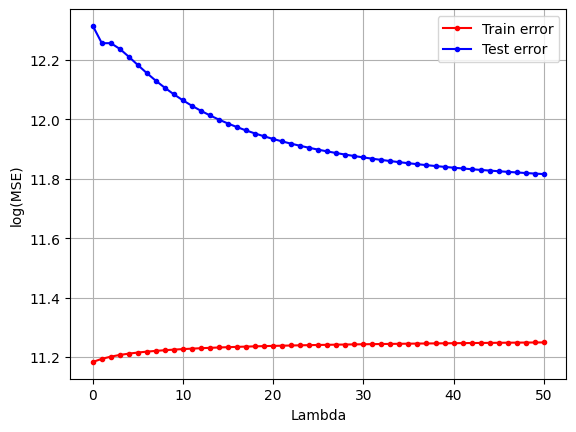

In [19]:
# Vaš kôd ovdje
X_train, X_test = train_test_split(X, train_size=0.5)
y_train, y_test = train_test_split(y, train_size=0.5)

testErr, trainErr = [], []

for l in range(0,51):
    formator = PolynomialFeatures(10, include_bias=True)
    fi_train = formator.fit_transform(X_train)
    fi_test = formator.fit_transform(X_test)
    
    model = Ridge(l,fit_intercept=False)
    model.fit(fi_train, y_train)
    
    h_train = model.predict(fi_train)
    h_test = model.predict(fi_test)
    
    trainErr.append(mean_squared_error(y_train, h_train))
    testErr.append(mean_squared_error(y_test, h_test))

plt.plot([x for x in range(0,51)], log(trainErr), color="red", label="Train error", marker=".")
plt.plot([x for x in range(0,51)], log(testErr), color="blue", label="Test error", marker=".")
plt.xlabel("Lambda")
plt.ylabel("log(MSE)")
plt.legend()
plt.grid(True)
plt.show()
    

### 5. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [20]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=5$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

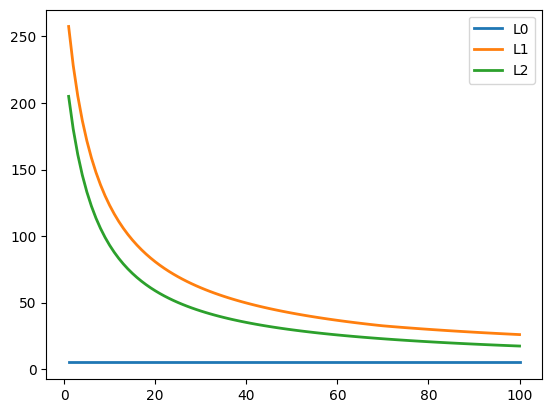

In [30]:
from sklearn.linear_model import Ridge
# Vaš kôd ovdje
L0, L1, L2 = [], [], []

for l in range(1,101):
    # ako ga ovdje
    formator = PolynomialFeatures(5, include_bias=True)
    fi = formator.fit_transform(X_train)
    
    model = Ridge(l)
    model.fit(fi, y_train)
    # moramo izbaciti bias tj w0
    #w_to_reg = model.coef_[1:]
    w = model.coef_[0][1:]
    
    L0.append(nonzeroes(w))
    L1.append(sum(abs(w)))
    L2.append(sqrt(sum(pow(w, 2))))

plt.plot(range(1,101), L0, label='L0', linewidth=2)
plt.plot(range(1,101), L1, label='L1', linewidth=2)
plt.plot(range(1,101), L2, label='L2', linewidth=2)
plt.legend()
plt.show()

### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

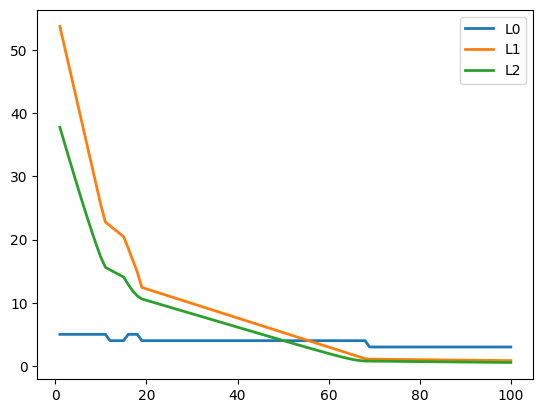

In [22]:
from sklearn.linear_model import Lasso
# Vaš kôd ovdje

L0, L1, L2 = [], [], []

for l in range(1,101):
    # ako ga ovdje
    formator = PolynomialFeatures(5, include_bias=True)
    fi_train = formator.fit_transform(X)
    #fi_test = formator.fit_transform(X_test)
    
    model = Lasso(l)
    model.fit(fi_train, y)
    # moramo izbaciti bias tj w0
    #w_to_reg = model.coef_[1:]
    w = model.coef_[1:]
    
    L0.append(nonzeroes(w))
    L1.append(sum(abs(w)))
    L2.append(np.sqrt(sum(pow(w, 2))))

plt.plot(range(1,101), L0, label='L0', linewidth=2)
plt.plot(range(1,101), L1, label='L1', linewidth=2)
plt.plot(range(1,101), L2, label='L2', linewidth=2)
plt.legend()
plt.show()

### 6. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [23]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

### a)

Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

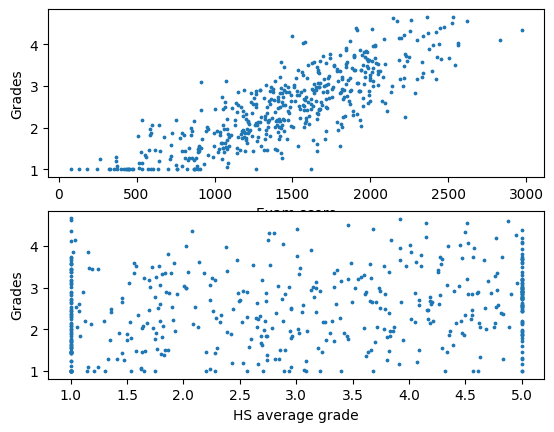

In [24]:
# Vaš kôd ovdje
# primjeri sa https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
plt.subplot(2,1,1)
plt.scatter(exam_score, grades_y, s=3)
plt.xlabel("Exam score")
plt.ylabel("Grades")

plt.subplot(2,1,2)
plt.scatter(grade_in_highschool, grades_y, s=3)
plt.xlabel("HS average grade")
plt.ylabel("Grades")
plt.show()

### b)

Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

In [25]:
# Vaš kôd ovdje
model = Ridge(0.01).fit(grades_X, grades_y)
h = model.predict(grades_X)

print(f"W=\nBias:\t{model.intercept_}\n{model.coef_}")

print(f"MSE=\t{mean_squared_error(grades_y, h)}")

W=
Bias:	0.15061179575776018
[0.00141497 0.09477276]
MSE=	0.23990435033172805


Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [26]:
from sklearn.preprocessing import StandardScaler
# Vaš kôd ovdje

grades_X_fixed = StandardScaler().fit_transform(grades_X)
# ovaj reshape ponudi interpreter provjeri zašto? - standard scaler je kriv
grades_y_fixed = StandardScaler().fit_transform(grades_y.reshape(-1,1))

model = Ridge(0.01).fit(grades_X_fixed, grades_y_fixed)
h = model.predict(grades_X_fixed)

print(f"W=\nBias:\t{model.intercept_}\n{model.coef_}")

print(f"MSE=\t{mean_squared_error(grades_y_fixed, h)}")

W=
Bias:	[8.62551331e-17]
[[0.81630375 0.15167761]]
MSE=	0.29228757017069595


**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 7. Multikolinearnost

### a)

Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [27]:
# Vaš kôd ovdje
# za dodavanje stupca u matricu: https://stackoverflow.com/questions/32827269/adding-columns-to-matrix-in-python
last_col = grades_X_fixed[:, -1].reshape(-1,1) # reshape jer bi inace dobili redak
grades_X_fixed_colinear = np.hstack((grades_X_fixed, last_col))
print(grades_X_fixed_colinear)

[[ 0.95063817 -0.78607869 -0.78607869]
 [-0.50343434 -0.50193004 -0.50193004]
 [ 1.18596832 -0.52213172 -0.52213172]
 ...
 [-0.31593552  0.80074234  0.80074234]
 [ 0.81288393  1.24783236  1.24783236]
 [-0.01938126  1.21729714  1.21729714]]


Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [28]:
# Vaš kôd ovdje
model = Ridge(0.01).fit(grades_X_fixed_colinear, grades_y_fixed)
h = model.predict(grades_X_fixed_colinear)

print(f"W=\nBias:\t{model.intercept_}\n{model.coef_}")

print(f"MSE=\t{mean_squared_error(grades_y_fixed, h)}")

W=
Bias:	[8.6255971e-17]
[[0.81630364 0.07583957 0.07583957]]
MSE=	0.2922875701674416


**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

### b)

Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [29]:
# Vaš kôd ovdje
for i in range(10):
    print(f"Instance{i}")
    model01 = Ridge(0.01)
    model1000= Ridge(1000)
    
    randIndexTrain = random.sample(range(0, len(grades_X_fixed_colinear)), round(len(grades_X_fixed_colinear)*0.5))

    grades_X_part = grades_X_fixed_colinear[randIndexTrain]
    grades_y_part = [grades_y_fixed[ind] for ind in randIndexTrain]
    model01.fit(grades_X_part, grades_y_part)
    h = model01.predict(grades_X_part)
    print("lambda=0.01")
    print(f"W=\nBias:\t{model01.intercept_}\n{model01.coef_}")
    print(f"MSE=\t{mean_squared_error(grades_y_part, h)}")
    
    model1000.fit(grades_X_part, grades_y_part)
    h = model01.predict(grades_X_part)
    print("lambda=1000")
    print(f"W=\nBias:\t{model1000.intercept_}\n{model1000.coef_}")
    print(f"MSE=\t{mean_squared_error(grades_y_part, h)}")
    print("______________________________________________________________")
    
    
    
    

Instance0
lambda=0.01
W=
Bias:	[-0.02285883]
[[0.76876421 0.06440593 0.06440593]]
MSE=	0.3188800426532584
lambda=1000
W=
Bias:	[-0.03658835]
[[0.15452209 0.03173244 0.03173244]]
MSE=	0.3188800426532584
______________________________________________________________
Instance1
lambda=0.01
W=
Bias:	[-0.03282794]
[[0.80303041 0.06367109 0.06367109]]
MSE=	0.31571410477268896
lambda=1000
W=
Bias:	[-0.02810207]
[[0.15734303 0.02723101 0.02723101]]
MSE=	0.31571410477268896
______________________________________________________________
Instance2
lambda=0.01
W=
Bias:	[-0.03744979]
[[0.83073685 0.0499681  0.0499681 ]]
MSE=	0.2712745699945844
lambda=1000
W=
Bias:	[-0.0358723]
[[0.17657663 0.01891968 0.01891968]]
MSE=	0.2712745699945844
______________________________________________________________
Instance3
lambda=0.01
W=
Bias:	[0.01176882]
[[0.81759734 0.07957215 0.07957215]]
MSE=	0.2944884101655488
lambda=1000
W=
Bias:	[-0.01575923]
[[0.16094398 0.03645727 0.03645727]]
MSE=	0.2944884101655488
___

**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.